#### import necessary modules

In [1]:
import sys
import pandas as pd
import cytoskel1 as csk1
from cytoskel1.mds_tree import mds_tree

#### Read in the transformed data as a pandas dataframe. In this case csk8.csv contains $arcsinh(x/5)$ transformed data from the wanderlust paper on B cell development.

In [2]:
df = pd.read_csv("../data/csk8.csv")

In [3]:
df.shape

(19486, 47)

In [4]:
df.columns

Index(['Time', 'Cell_length', 'CD3-1', 'CD3-2', 'CD235-61-66b', 'CD3-3',
       'CD45', 'cPARP', 'pPLCg', 'CD19', 'CD22', 'pSrc', 'IgD', 'CD79b',
       'CD20', 'CD34', 'CD179a', 'pSTAT5', 'CD72', 'Ki67', 'IgM-i', 'Kappa',
       'CD10', 'Lambda', 'CD179b', 'pAKT', 'CD49d', 'CD24', 'CD127', 'RAG1',
       'TdT', 'Pax5', 'pSyk', 'pErk12', 'CD38', 'pP38', 'CD40', 'CD117', 'pS6',
       'CD33-11c-16', 'HLADR', 'IgM-s', 'pCreb', 'DNA1', 'DNA2', 'beadDist',
       'wanderlust'],
      dtype='object')

#### The markers to be used for constructing the k nearest neighbor graph (k-NN graph) , minimum spanning tree (MST) and the branching trajectories:

In [5]:
traj_cols = ['CD45', 'CD19', 'IgD', 'CD79b', 'CD20', 'CD34', 'CD179a',
        'CD72', 'IgM-i', 'Kappa', 'CD10', 'Lambda', 'CD179b', 'CD24', 'CD38',
        'CD117', 'HLADR', 'IgM-s']

#### The markers which will be averaged. This includes the trajectory markers as a subset:

In [6]:
 avg_cols = ['CD3-1', 'CD3-2', 'CD235-61-66b', 'CD3-3', 'CD45', 'cPARP', 'pPLCg',
        'CD19', 'CD22', 'pSrc', 'IgD', 'CD79b', 'CD20', 'CD34', 'CD179a', 'pSTAT5',
        'CD72', 'Ki67', 'IgM-i', 'Kappa', 'CD10', 'Lambda', 'CD179b', 'pAKT', 'CD49d',
        'CD24', 'CD127', 'RAG1', 'TdT', 'Pax5', 'pSyk', 'pErk12', 'CD38', 'pP38',
        'CD40', 'CD117', 'pS6', 'CD33-11c-16', 'HLADR', 'IgM-s', 'pCreb']


##### Create a cytoskel object, csk. This also creates a new cytoskel project folder - in this case named "wanderlust1". Setting l1_normalize to True normalizes the sum of the trajectory markers to 1 for the purpose of constructiong the graphs only. This helps make up for variations in cell size due to, for example, cell cycle and division. Averaging uses the original coordinates.

In [7]:
csk = csk1.cytoskel("wanderlust1")
csk.create(df,traj_cols,l1_normalize=True)

Create the nearest neighbor graph and the minimum spanning tree

In [8]:
 csk.do_graphs(n_process=8)

starting graphs with 8 processes
starting mst
mst components 1
graph time 6.525972843170166


Find the branches. Here we do 4 branchings, therefore the tree will have 6 ends.

Find branches. If branchings = 0, then only single branch is constructed but this may not be from starting condition to ending condition. The number of tree ends is branchings+2.

In [9]:
branchings = 4

In [10]:
 csk.do_branches(-1,branchings)

using bpnts


Carry out the MST averaging to smooth the trajectory.

In [11]:
csk.get_average_fix(avg_cols,navg=5,ntree=4)

navg 5 ntree 4
mst_nn done 3.580219030380249
avg time 0.12555289268493652


In [12]:
mt = mds_tree(csk)
mt.mk_tree()

In [13]:
 clist = ['CD34','Kappa','Lambda', 'CD38']



In [14]:
nrow = 1; ncol = 4;

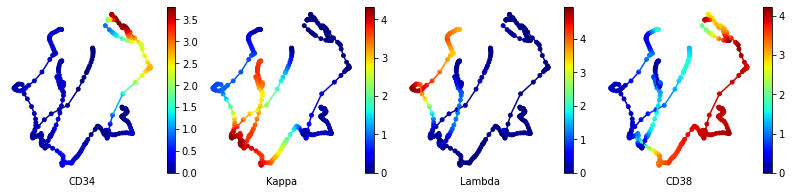

In [15]:
mt.plot(clist,nrow,ncol)

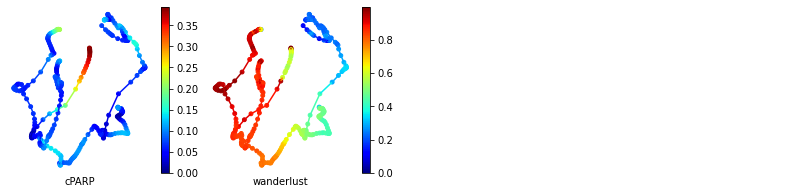

In [16]:
mt.plot(['cPARP','wanderlust'],nrow,ncol)